In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
historical_df = pd.read_csv("callcenterdatahistorical.csv")
current_df = pd.read_csv("callcenterdatacurrent.csv")

In [3]:
historical_df.head()

,CREATIONDATE,OBJECTDESC,TITLE,CLOSEDDATETIME,CASECLOSUREREASONDESCRIPTION
0,2023-12-31 00:00:00,"3508 N 40TH ST, MILWAUKEE, WI, 53216-3419",Missed Collection: Additional Items,NaN,Tenants moved and left 1 cubic yard household ...
1,2023-12-31 00:00:00,"4217 A S 13TH ST, MILWAUKEE, WI, 53221-1728",Area Dark,2024-01-01 00:00:00,All streets lights are out on S. 13th St betwe...
2,2023-12-31 00:00:00,"1502 W HOWARD AV, MILWAUKEE, WI, 53221-1903",Street Light Out,2024-01-01 00:00:00,"Two street lights out on center median, over w..."
3,2023-12-31 00:00:00,"2978 S MABBETT AV, MILWAUKEE, WI, 53207-2525",Garbage Cart Collection Request: Cart Not at C...,NaN,I was out of town and failed to put our bin ou...
4,2023-12-31 00:00:00,"3016 N 23RD ST, MILWAUKEE, WI, 53206-1649",Garbage Cart: No Cart,NaN,Garbage cans stolen and needs replacement for ...


In [4]:
current_df.head()

,CREATIONDATE,OBJECTDESC,TITLE,CLOSEDDATETIME,CASECLOSUREREASONDESCRIPTION
0,2024-08-11 00:00:00,"3821 S 51ST ST, MILWAUKEE, WI, 53220-2021",Recycling Cart: Damaged,NaN,Both of the recycling bins lids are damaged. O...
1,2024-08-11 00:00:00,3801 S CHEROKEE WA,"Brush Pickup Request, Less than 2 Cubic Yards,...",NaN,NaN
2,2024-08-11 00:00:00,"2980 S HERMAN ST, MILWAUKEE, WI, 53207-2472",Missed Collection: Recycling,2024-08-12 00:00:00,Recycling can was out and ready for collection...
3,2024-08-11 00:00:00,"9931 W BELOIT RD, MILWAUKEE, WI, 53227-4272",Potholes,NaN,This hole has been filled 4 times and it's sti...
4,2024-08-11 00:00:00,"3458 S 60TH ST, MILWAUKEE, WI, 53219-4343",Alley Light Out,2024-08-12 00:00:00,"Light was turning on an off for a while, but n..."


In [5]:
print("")
nums_rows, nums_columns = historical_df.shape
print(f'Number of rows: {nums_rows}\nNumber of columns: {nums_columns}')


Number of rows: 157960
Number of columns: 5


In [6]:
nums_rows, nums_columns = current_df.shape
print(f'Number of rows: {nums_rows}\nNumber of columns: {nums_columns}')

Number of rows: 4725
Number of columns: 5


In [7]:
# Checking for duplicates
hist_duplicate = historical_df.duplicated().any()
curr_duplicate = current_df.duplicated().any()
print(hist_duplicate)
print(curr_duplicate)

True
True


In [8]:
# Find duplicated rows
hist_rows = historical_df[historical_df.duplicated(keep=False)]
curr_rows = current_df[current_df.duplicated(keep=False)]

# Print duplicated rows
print("Historical Duplicated Rows:")
print(hist_rows)
print("Current Duplicated Rows:")
print(curr_rows)


Historical Duplicated Rows:
               CREATIONDATE                                  OBJECTDESC  \
149     2023-12-18 00:00:00    506 S 69TH ST, MILWAUKEE, WI, 53214-1616   
150     2023-12-18 00:00:00    506 S 69TH ST, MILWAUKEE, WI, 53214-1616   
360     2023-11-29 00:00:00                               228 N 68TH ST   
361     2023-11-29 00:00:00                               228 N 68TH ST   
438     2023-11-26 00:00:00  306 E LOCUST ST, MILWAUKEE, WI, 53212-2525   
...                     ...                                         ...   
157835  2020-05-18 00:00:00                                         NaN   
157836  2020-05-18 00:00:00                                         NaN   
157840  2020-05-18 00:00:00                                         NaN   
157841  2020-05-18 00:00:00                                         NaN   
157842  2020-05-18 00:00:00                                         NaN   

                                                  TITLE       CLOSEDDAT

In [9]:
# Drop duplicates
clean_hist_df = historical_df.drop_duplicates().copy()
clean_curr_df = current_df.drop_duplicates().copy()

In [10]:
print("length of original historical:", len(historical_df),"\nlength of clean historial:", len(clean_hist_df))
print("length of original historical:", len(current_df),"\nlength of clean historial:", len(clean_curr_df))

length of original historical: 157960 
length of clean historial: 121000
length of original historical: 4725 
length of clean historial: 4715


In [11]:
# Check for null values
clean_hist_df.isnull().sum()

CREATIONDATE                        0
OBJECTDESC                      12916
TITLE                               0
CLOSEDDATETIME                  89325
CASECLOSUREREASONDESCRIPTION    16759
dtype: int64

In [12]:
clean_curr_df.isnull().sum()

CREATIONDATE                       0
OBJECTDESC                         0
TITLE                              0
CLOSEDDATETIME                  2749
CASECLOSUREREASONDESCRIPTION     841
dtype: int64

There are a good number of null values, especially for the closed datetime column. I want to assume that those are null if the ticket is still open but many have a value in the closure reason description implying that's not the case. I hate to just drop that much data but given the brief brief case study here I'm going to drop it for now. There should be some further investigation into why the CLOSEDDATETIME is NULL for so many data points

In [13]:
# This will drop the row only if the CLOSEDDATETIME column is null when the CASECLOSUREREASONDESCRIPTION is not
# Will also dorp rows for when the OBJECTDESC column is null in the historical dataframe
master_clean_hist_df = clean_hist_df[~(clean_hist_df['CASECLOSUREREASONDESCRIPTION'].notna() & clean_hist_df['CLOSEDDATETIME'].isna())].copy()
master_clean_hist_df = master_clean_hist_df.dropna(subset=['OBJECTDESC']).copy()
master_clean_curr_df = clean_curr_df[~(clean_curr_df['CASECLOSUREREASONDESCRIPTION'].notna() & clean_curr_df['CLOSEDDATETIME'].isna())].copy()

In [14]:
print("length of master historical:", len(master_clean_hist_df),"\nlength of clean historial:", len(clean_hist_df))
print("length of master historical:", len(master_clean_curr_df),"\nlength of clean historial:", len(clean_curr_df))

length of master historical: 28671 
length of clean historial: 121000
length of master historical: 2480 
length of clean historial: 4715


In [15]:
print(master_clean_hist_df.info())
print(master_clean_hist_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28671 entries, 1 to 157959
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   CREATIONDATE                  28671 non-null  object
 1   OBJECTDESC                    28671 non-null  object
 2   TITLE                         28671 non-null  object
 3   CLOSEDDATETIME                19275 non-null  object
 4   CASECLOSUREREASONDESCRIPTION  17345 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB
None
               CREATIONDATE                                        OBJECTDESC  \
count                 28671                                             28671   
unique                 1230                                             22434   
top     2023-04-03 00:00:00  841 N BROADWAY, MILWAUKEE, WISCONSIN, 53202-3607   
freq                    367                                                20   

                                 T

In [16]:
print(master_clean_curr_df.info())
print(master_clean_curr_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2480 entries, 1 to 4724
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   CREATIONDATE                  2480 non-null   object
 1   OBJECTDESC                    2480 non-null   object
 2   TITLE                         2480 non-null   object
 3   CLOSEDDATETIME                1966 non-null   object
 4   CASECLOSUREREASONDESCRIPTION  1639 non-null   object
dtypes: object(5)
memory usage: 116.2+ KB
None
               CREATIONDATE                                    OBJECTDESC  \
count                  2480                                          2480   
unique                  223                                          2253   
top     2024-04-28 00:00:00  7919 W KATHRYN AV, MILWAUKEE, WI, 53218-3727   
freq                     71                                             8   

                                                    TIT

In [17]:
# Update column data types
master_clean_hist_df['CREATIONDATE'] = pd.to_datetime(master_clean_hist_df['CREATIONDATE'], format = '%Y-%m-%d %H:%M:%S')
master_clean_hist_df['CLOSEDDATETIME'] = pd.to_datetime(master_clean_hist_df['CLOSEDDATETIME'], format = '%Y-%m-%d %H:%M:%S')
master_clean_curr_df['CREATIONDATE'] = pd.to_datetime(master_clean_curr_df['CREATIONDATE'], format = '%Y-%m-%d %H:%M:%S')
master_clean_curr_df['CLOSEDDATETIME'] = pd.to_datetime(master_clean_curr_df['CLOSEDDATETIME'], format = '%Y-%m-%d %H:%M:%S')

In [18]:
# Create column for how long ticket was open
master_clean_hist_df['TICKETDURATION'] = master_clean_hist_df['CLOSEDDATETIME'] - master_clean_hist_df['CREATIONDATE']
master_clean_curr_df['TICKETDURATION'] = master_clean_curr_df['CLOSEDDATETIME'] - master_clean_curr_df['CREATIONDATE']

In [19]:
master_clean_hist_df.sample(10)

,CREATIONDATE,OBJECTDESC,TITLE,CLOSEDDATETIME,CASECLOSUREREASONDESCRIPTION,TICKETDURATION
156771,2020-05-19,"4621 N 45TH ST, MILWAUKEE, WISCONSIN, 53218-5206",Clogged Catch Basin/Surface Flooding,NaT,NaN,NaT
85211,2020-09-10,"4464 S HOWELL AV, MILWAUKEE, WISCONSIN, 53207-...","Brush Pickup Request, Less than 2 Cubic Yards,...",NaT,NaN,NaT
9067,2023-03-25,"3322 N 29TH ST, MILWAUKEE, WI, 53216-3806",Backwater,2023-03-25,sewage back up in her basement.,0 days
7305,2023-04-06,"238 S 63RD ST, MILWAUKEE, WI, 53214-1825",City Tree Stump Not Removed,2023-04-06,2 houses east from our home. caller hoping stu...,0 days
111708,2020-08-04,"4325 W GARFIELD AV, MILWAUKEE, WISCONSIN, 5320...",No Heat,2020-08-20,"Mold, spiders, leaking ceiling. 4325 A.",16 days
82518,2020-09-15,"3570 S 96TH ST, MILWAUKEE, WISCONSIN, 53228-1413",Hardship Program Registration Request,NaT,NaN,NaT
49042,2020-10-28,"4161 N 66TH ST, MILWAUKEE, WISCONSIN, 53216-1172",Garbage Cart Collection Request: Cart Not at C...,NaT,NaN,NaT
14982,2022-03-12,"2518 N DOUSMAN ST, MILWAUKEE, WISCONSIN, 53212...",Sewer Odor,2022-03-12,"Caller reports terrible smell in the air, odor...",0 days
88522,2020-09-05,"3445 S 15TH ST, MILWAUKEE, WISCONSIN, 53215-5027","Brush Pickup Request, Less than 2 Cubic Yards,...",NaT,NaN,NaT
136017,2020-06-22,2973 N CRAMER ST,Scattered Litter and Debris on Private Property,2020-06-29,"Scattered trash in the easement, front yard an...",7 days


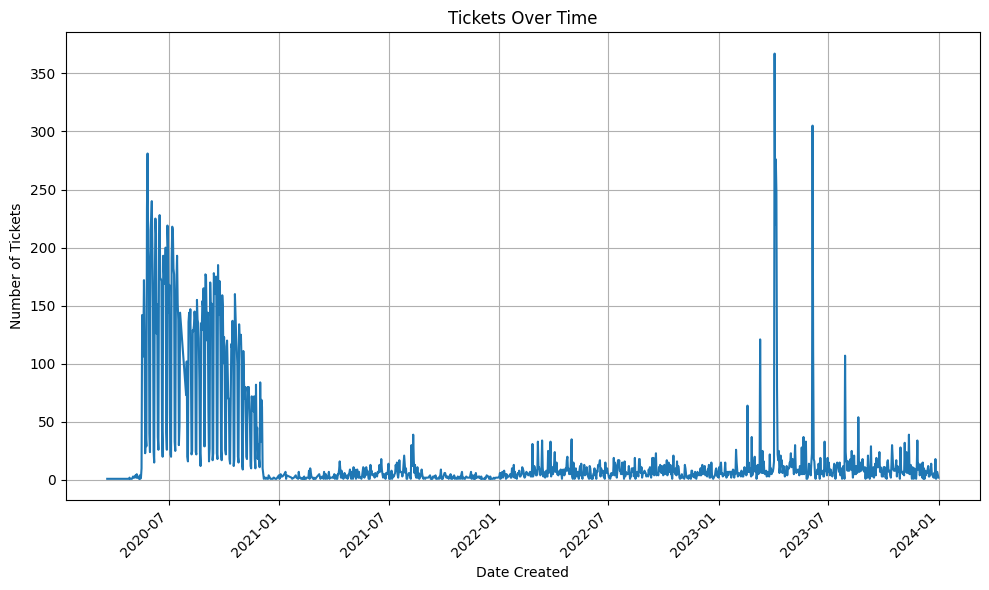

In [20]:
# Plotting ticket trends over time
ticket_trends = master_clean_hist_df.groupby('CREATIONDATE').size()

plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line')
plt.title('Tickets Over Time')
plt.xlabel('Date Created')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

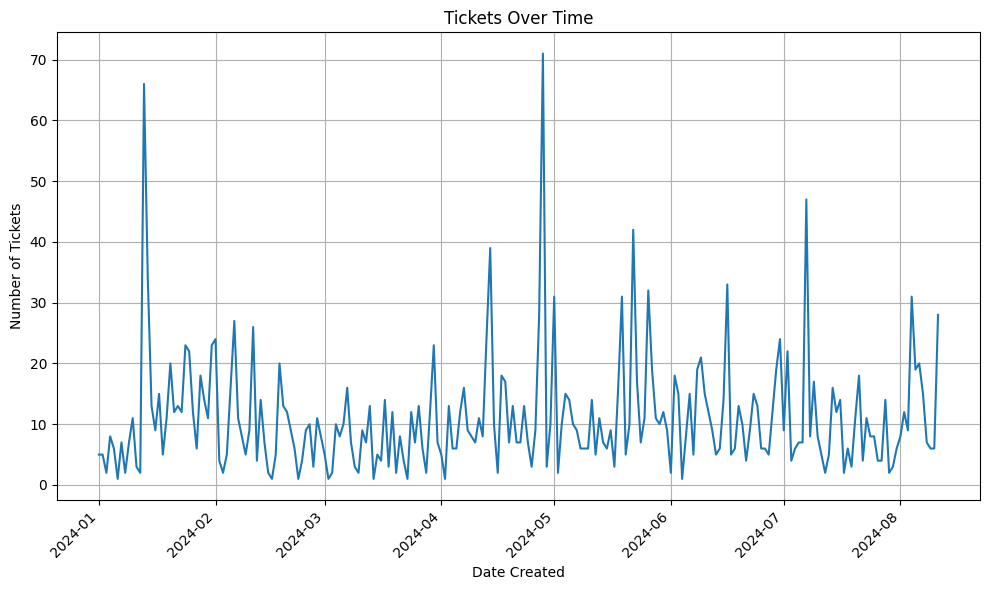

In [21]:
# Plotting ticket trends over time
ticket_trends = master_clean_curr_df.groupby('CREATIONDATE').size()

plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line')
plt.title('Tickets Over Time')
plt.xlabel('Date Created')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Combined historical and current dataframes to a single one.
# It looks like it's just the first of the year that divides them
master_df = pd.concat([master_clean_hist_df, master_clean_curr_df])

In [23]:
master_df.sample(10)

,CREATIONDATE,OBJECTDESC,TITLE,CLOSEDDATETIME,CASECLOSUREREASONDESCRIPTION,TICKETDURATION
13400,2022-06-14,"3148 N DOUSMAN ST, MILWAUKEE, WI, 53212-2246","Brush Pickup Request, Less than 2 Cubic Yards,...",2022-06-14,Tree trimmings next to garage,0 days
96717,2020-08-26,"2424 W TRIPOLI AV, MILWAUKEE, WISCONSIN, 53221...",Scattered Litter and Debris on Private Property,2020-09-11,Outdoor storage of grocery carts and other items,16 days
146658,2020-06-04,"4774 S 27TH ST, MILWAUKEE, WISCONSIN, 53221-2602",Exterior of Building in Disrepair,2020-06-06,"dumpster capacity, more frequent pick ups and ...",2 days
75777,2020-09-23,"4117 N 23RD ST, MILWAUKEE, WISCONSIN, 53209-6603",Weeds and Tall Grass Complaint,2020-09-24,Tall weeds encroaching alley,1 days
104959,2020-08-13,"1966 W VIENNA AV, MILWAUKEE, WISCONSIN, 53206-...",Branches or Bushes Encroaching Alley,2020-09-09,AFFECTING ALLEY VISIBILITY,27 days
31177,2020-11-18,"2618 N HACKETT AV, MILWAUKEE, WISCONSIN, 53211...",Defective Parking Meter,NaT,NaN,NaT
9731,2023-02-21,"10223 W VERA AV, MILWAUKEE, WI, 53224-4439",Missed Collection: Garbage,2023-02-22,Somehow our garbage cart was not collected. We...,1 days
60186,2020-10-14,"1122 W WRIGHT ST, MILWAUKEE, WISCONSIN, 53206-...",Branches or Bushes Encroaching Alley,2020-10-15,Encroaching throughout alleyway.,1 days
120299,2020-07-14,"3048 N 11TH LA, MILWAUKEE, WISCONSIN, 53206-2743",City-Owned Building Trees,2020-07-23,"Overgrown grass, trees and bushes encroaching ...",9 days
93939,2020-08-28,"5330 N 57TH ST, MILWAUKEE, WISCONSIN, 53218-3224",Gutters Defective,2020-09-30,GUTTERS- Missing & lots of Water enter into th...,33 days


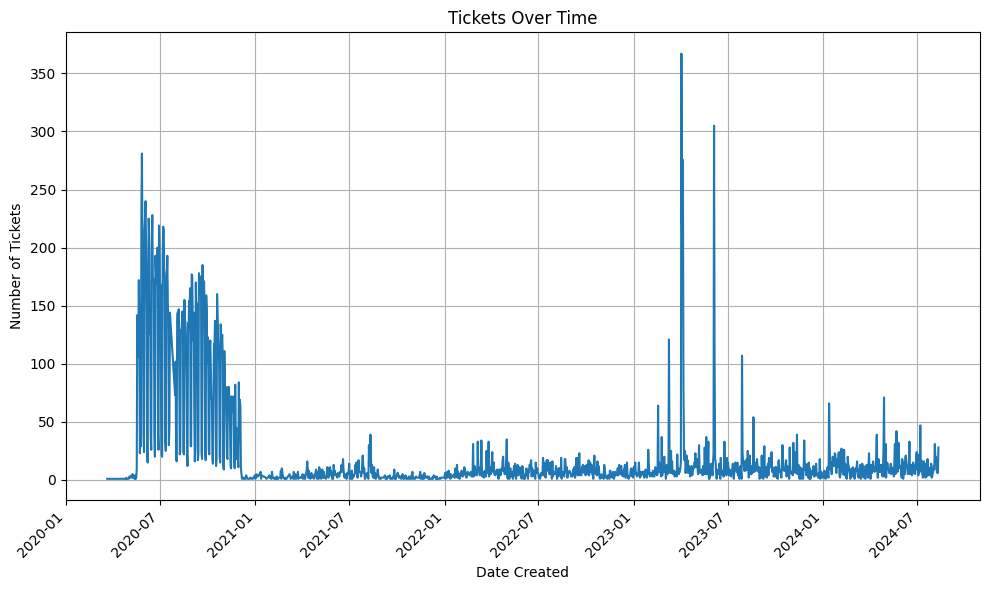

In [24]:
# Plotting ticket trends over time
ticket_trends = master_df.groupby('CREATIONDATE').size()

plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line')
plt.title('Tickets Over Time')
plt.xlabel('Date Created')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

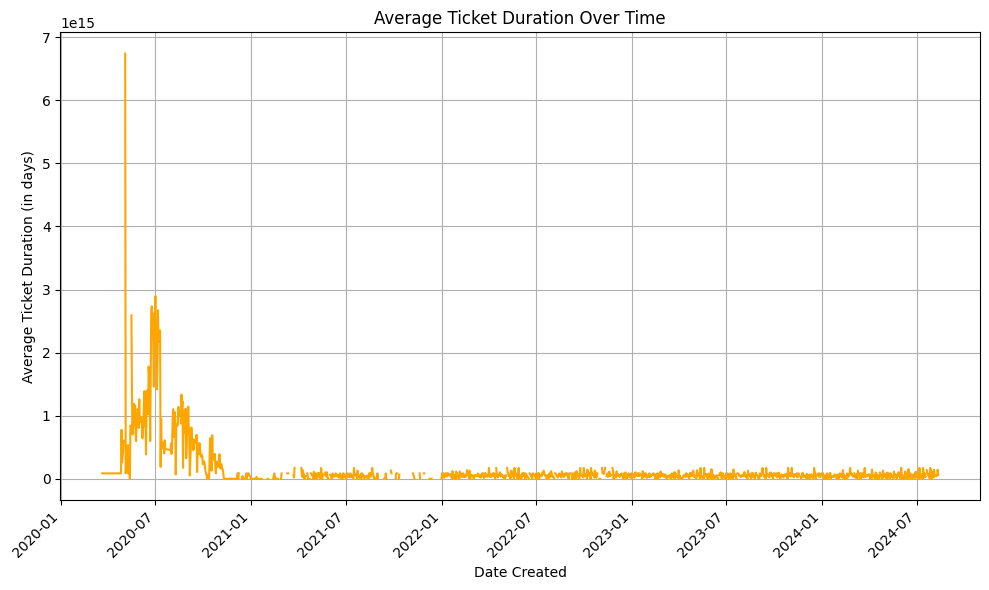

In [25]:
# Group by 'CREATIONDATE' and calculate the average TICKETDURATION
average_duration_trends = master_df.groupby('CREATIONDATE')['TICKETDURATION'].mean()

# Plotting the average ticket duration over time
plt.figure(figsize=(10, 6))
average_duration_trends.plot(kind='line', color='orange')
plt.title('Average Ticket Duration Over Time')
plt.xlabel('Date Created')
plt.ylabel('Average Ticket Duration (in days)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
master_df['CREATIONYearMonth'] = master_df['CREATIONDATE'].dt.to_period('M')

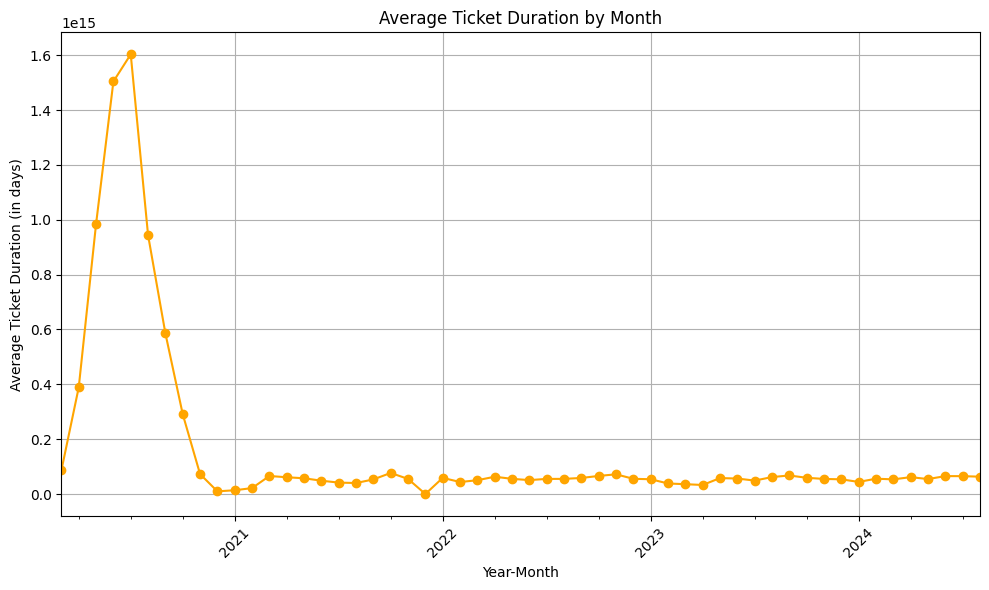

In [27]:
# Group by the new 'YearMonth' period and calculate the average TICKETDURATION
average_duration_trends = master_df.groupby('CREATIONYearMonth')['TICKETDURATION'].mean()

# Plotting the average ticket duration by month
plt.figure(figsize=(10, 6))
average_duration_trends.plot(kind='line', marker='o', color='orange')
plt.title('Average Ticket Duration by Month')
plt.xlabel('Year-Month')
plt.ylabel('Average Ticket Duration (in days)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

I originally wanted to build a word map but my wordmap library is struggling. I found this alternative.

In [32]:
from collections import Counter
import re

In [ ]:
# Define a list of stop words
stop_words = set([
    'a', '2', 'not', 'been', 'have', 'was', 'that', 'out', 'are', 'has', 'up', 'i', 'less', 'than', 'and', 'the', 'is', 'in', 'to', 'of', 'for', 'on', 'with', 'as', 'this', 'it', 'an', 'by', 'or', 'at', 'from'
])

Text(0.5, 1.0, 'Top 20 Words by Frequency in Ticket Title (Excluding Stop Words)')

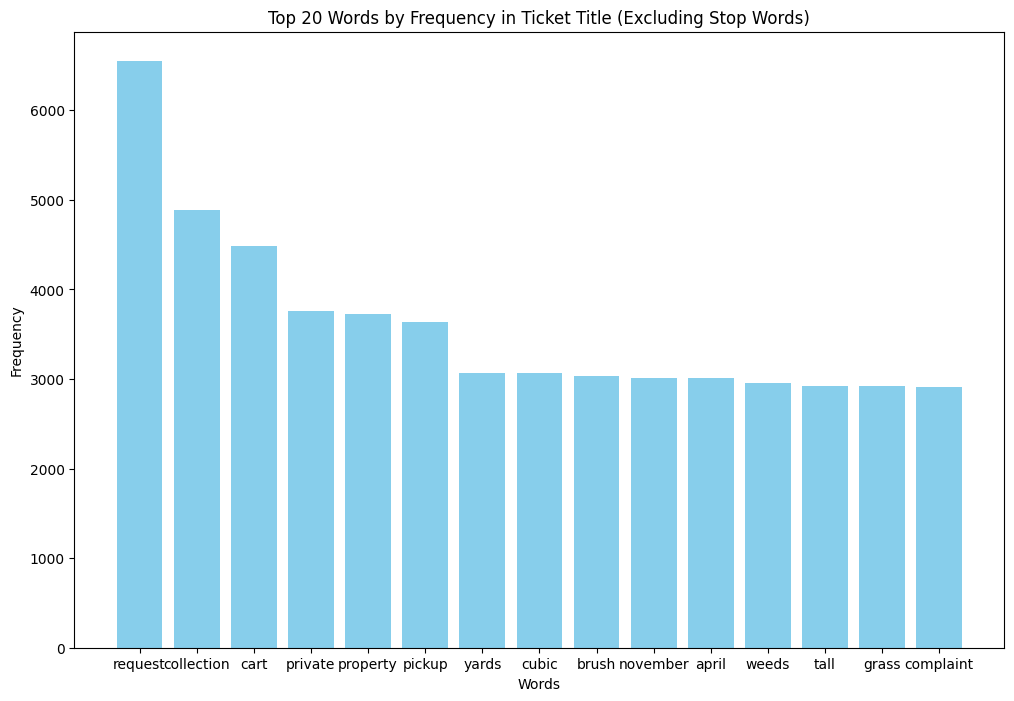

In [39]:
# Combine all the text from the column into a single string
text = ' '.join(master_df['TITLE'])

# Clean and tokenize the text
words = re.findall(r'\b\w+\b', text.lower())  # Convert to lowercase and find words

# Remove stop words
filtered_words = [word for word in words if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)

# Convert to DataFrame for plotting
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False)

# Limit to top words so the graph isn't ugly
top_words_df = word_counts_df.head(15)

# Plotting the word frequencies
plt.figure(figsize=(12, 8))
plt.bar(top_words_df['Word'], top_words_df['Frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Words by Frequency in Ticket Title (Excluding Stop Words)')


In [45]:
# Convert all values to strings and handle missing values
master_df['CASECLOSUREREASONDESCRIPTION'] = master_df['CASECLOSUREREASONDESCRIPTION'].fillna('').astype(str)

Text(0.5, 1.0, 'Top 15 Words by Frequency in Closure Reason (Excluding Stop Words)')

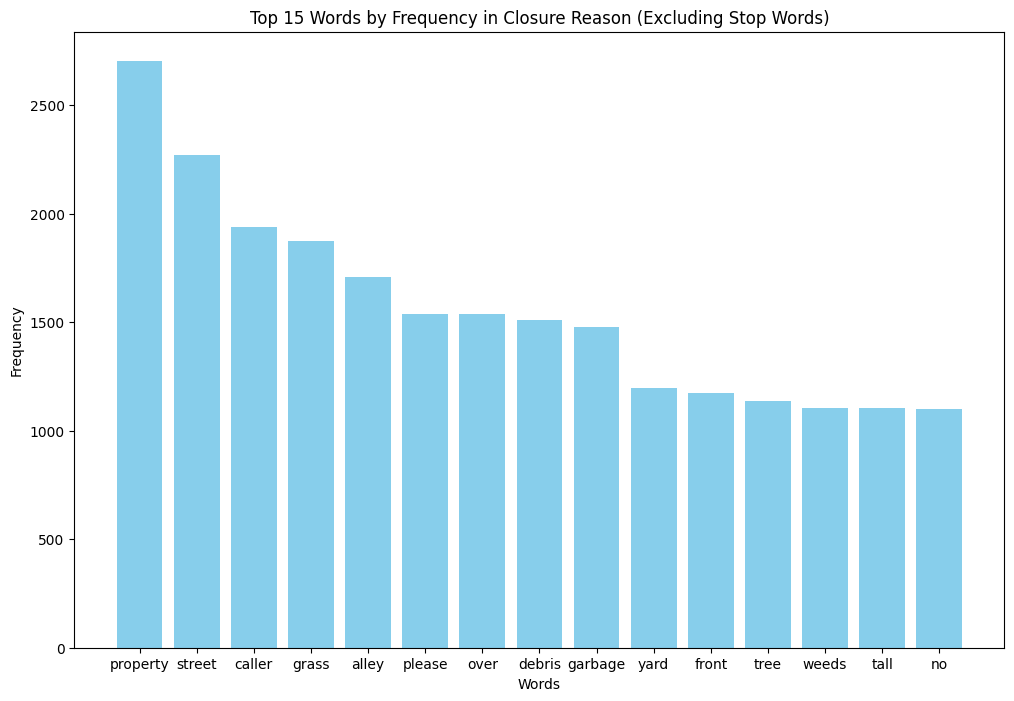

In [49]:
# Combine all the text from the column into a single string
text = ' '.join(master_df['CASECLOSUREREASONDESCRIPTION'])

# Clean and tokenize the text
words = re.findall(r'\b\w+\b', text.lower())  # Convert to lowercase and find words

# Remove stop words
filtered_words = [word for word in words if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)

# Convert to DataFrame for plotting
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False)

# Limit to top words so the graph isn't ugly
top_words_df = word_counts_df.head(15)

# Plotting the word frequencies
plt.figure(figsize=(12, 8))
plt.bar(top_words_df['Word'], top_words_df['Frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Words by Frequency in Closure Reason (Excluding Stop Words)')

## Summary

* Investigate some of the bad data with closed ticket dates. What do so many tickets have a description for why they're closed without having a closed date?
* Investigate reasons for why tickets took longer to close in 2020. Was it covid? If it was COVID, was it something that could be avoided in the future?
* Based on the word search, looks like most tickets are created have to do with yard/property issues. Can something proactively be done to help with these?

## Things to try in the future
* Build a map using the addresses to show where the tickets are coming from the most. Are there certain neighborhoods that need more support/attention?
* Is there a way to add customer sentiment data after the ticket is closed?